#### About
> Bayesian Inference.

Bayesian inference is a method of statistical inference in which the probability of a hypothesis is updated based on new evidence, using Bayes' theorem. It is a way to quantify how confident we are in a hypothesis, given some prior belief about its probability and some observed evidence. Bayesian inference can be used to make predictions, estimate parameters, and test hypotheses.

> Steps of Bayesian Inference are as follows

1. Specify a prior prob. distribution for the hypothesis of interest.
2. Collect new evidence and update the prior prob. using bayes theorem to obtain a posterior prob. distribution.
3. Use the posterior prob. distribution to make predictions or estimate params. 



In [2]:
import pymc3 as pm
import numpy as np

# generate some data
np.random.seed(123)
data = np.random.normal(10, 2, 100) # generate synthetic data from a normal dist with mean 10 and std 2

In Bayesian Inference, the likelihood function plays a crucial role in calculating the posterior distribution. The posterior distribution is proportional to the product of the likelihood function and the prior distribution. In other words, the likelihood function informs us how likely the observed data is, given the values of the parameters, and the prior distribution informs us about our belief or uncertainty about the values of the parameters before observing the data.

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

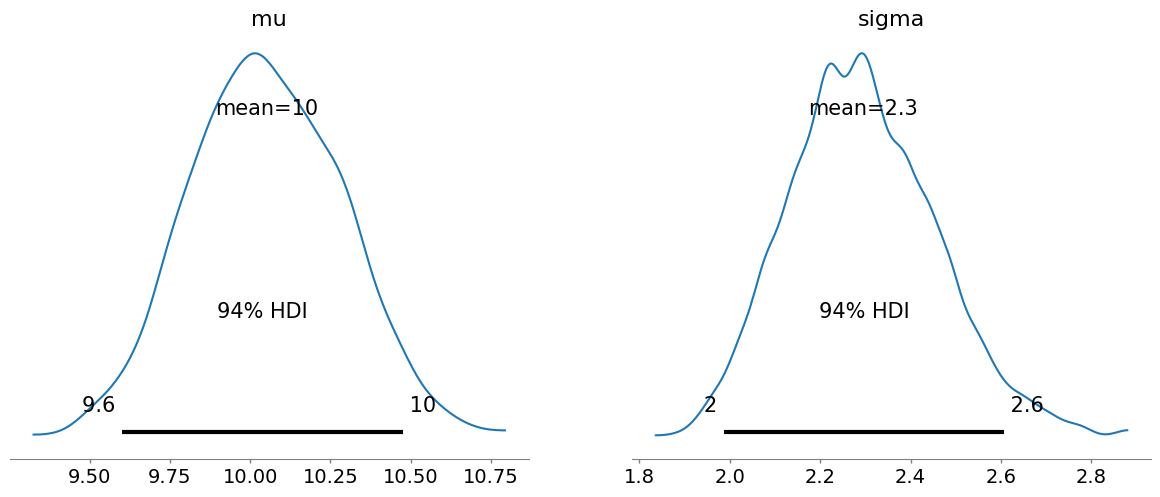

In [3]:
#using normal dist with mean 0 and std 10 for prior of mean
#and half normal distribution with std dev 10 for prior of the std. dev

with pm.Model() as model:
    mu = pm.Normal('mu',mu=0, sd=10)
    sigma = pm.HalfNormal('sigma',sd=10)

    # specifying likelihood as normal dist with mean equal to mu and std = sigma 

    likelihood = pm.Normal('likelihood',mu=mu,sd=sigma,observed=data)

    # sampling from posterior distribution using markov chain monte carlo methods

    trace = pm.sample(1000, tune=1000, cores=1)


#plotting the posterior distribution
pm.plot_posterior(trace)

This shows the updated prob dist for the parameters of interest, given the observed data and our prior beliefs

In [4]:
# extract the mean and standard deviation of the posterior distribution of mu
mu_posterior_mean = np.mean(trace['mu'])
mu_posterior_std = np.std(trace['mu'])

# extract the mean and standard deviation of the posterior distribution of sigma
sigma_posterior_mean = np.mean(trace['sigma'])
sigma_posterior_std = np.std(trace['sigma'])

In [5]:
print("Posterior mean of mu:", mu_posterior_mean)
print("Posterior std of mu:", mu_posterior_std)
print("Posterior mean of sigma:", sigma_posterior_mean)
print("Posterior std of sigma:", sigma_posterior_std)

Posterior mean of mu: 10.050851423128286
Posterior std of mu: 0.2383668539935041
Posterior mean of sigma: 2.2943830404102337
Posterior std of sigma: 0.16659854260086973


Some use cases of Bayesian inference include:

Medical diagnosis: Bayesian inference can be used to estimate the probability of a patient having a certain disease, given some observed symptoms and prior knowledge about the prevalence of the disease.

Customer segmentation: Bayesian inference can be used to segment customers based on their behavior and preferences, and to estimate the probability of a customer belonging to a certain segment.

Forecasting: Bayesian inference can be used to make predictions about future events, such as stock prices or weather patterns, using observed data and prior knowledge about the underlying processes.